# Ìndixi de Gini in Sardìnnia in su 2019

Pigaus is informus de s'
[ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=MEF_REDDITIIRPEF_COM) po su _dataset_
de su 2019 _"Contribuenti e reddito complessivo per classi di importo"_. Custus informus
funt donaus cun licèntzia [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/).

In [1]:
import pandas as pd

raw_data = pd.read_csv(
    'data/arrenda-irpef-comunus-2022-01-31.csv', encoding="utf-8", comment='#')
raw_data.head()


,ITTER107,Territorio,TIPO_DATO_MEF,Tipo dato,IMPORTOEURO,Classe di importo,TIME,Seleziona anno di imposta,Value,Flag Codes,Flags
0,1272,Torino,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,71.0,NaN,NaN
1,1272,Torino,AGGINCR,reddito per classi di importo,E_UN0,minore o uguale a 0 euro,2019,2019,-441269.0,NaN,NaN
2,2158,Vercelli,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,NaN,c,dato oscurato per la tutela del segreto statis...
3,2158,Vercelli,AGGINCR,reddito per classi di importo,E_UN0,minore o uguale a 0 euro,2019,2019,NaN,c,dato oscurato per la tutela del segreto statis...
4,3106,Novara,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,5.0,NaN,NaN


Limpiaus is informus, ndi bogaus is colonnas chi no eus a imperai.

In [2]:
raw_data.drop(["ITTER107", "TIPO_DATO_MEF", "IMPORTOEURO",
              "TIME"], axis=1, inplace=True)


Po dònnia "crassi de arrenda" poneus una litera. De i-custa manera is crassis ddas podeus
ordinai allestru candu si serbit.

In [3]:

from ast import literal_eval


def _codify_class(value):
    value = value.strip()
    if value in "minore o uguale a 0 euro":
        return 'A'
    elif value in "0 - 10.000 euro":
        return 'B'
    elif value in "10.000 - 15.000 euro":
        return 'C'
    elif value in "15.000 - 26.000 euro":
        return 'D'
    elif value in "26.000 - 55.000 euro":
        return 'E'
    elif value in "55.000 - 75.000 euro":
        return 'F'
    elif value in "75.000 - 120.000 euro":
        return 'G'
    elif value in "120.000 euro e più":
        return 'H'
    else:
        raise NameError("Bad class")


raw_data['Classe'] = raw_data['Classe di importo'].apply(_codify_class)
raw_data.head()


,Territorio,Tipo dato,Classe di importo,Seleziona anno di imposta,Value,Flag Codes,Flags,Classe
0,Torino,contribuenti per classe di importo,minore o uguale a 0 euro,2019,71.0,NaN,NaN,A
1,Torino,reddito per classi di importo,minore o uguale a 0 euro,2019,-441269.0,NaN,NaN,A
2,Vercelli,contribuenti per classe di importo,minore o uguale a 0 euro,2019,NaN,c,dato oscurato per la tutela del segreto statis...,A
3,Vercelli,reddito per classi di importo,minore o uguale a 0 euro,2019,NaN,c,dato oscurato per la tutela del segreto statis...,A
4,Novara,contribuenti per classe di importo,minore o uguale a 0 euro,2019,5.0,NaN,NaN,A


## Aprontaus is informus

Imoi po dònnia comunu ("Territorio") e po dònnia crassi de arrenda ("Classe di importo")
eus a ponni impari su nùmeru de personi e su contu de totu s' arrenda.

In [4]:
index_columns = ["Territorio", "Classe"]
place_and_income_data = raw_data.pivot_table(index=index_columns, columns="Tipo dato", values="Value") \
    .reset_index(level=1)
place_and_income_data.loc[['Cagliari']]


Tipo dato,Classe,contribuenti per classe di importo,reddito per classi di importo
Territorio,,,
Cagliari,A,17.0,-1.112810e+05
Cagliari,B,28257.0,1.249891e+08
Cagliari,C,11256.0,1.402271e+08
Cagliari,D,25280.0,5.189067e+08
Cagliari,E,28362.0,1.009187e+09
Cagliari,F,4461.0,2.876169e+08
Cagliari,G,3515.0,3.190210e+08
Cagliari,H,1248.0,2.654534e+08


Lìmpia is informus chi no funt bonus

In [5]:
place_and_income_data['reddito per classi di importo'] = place_and_income_data['reddito per classi di importo'] \
    .apply(lambda v: 0 if v < 0 else v)
place_and_income_data.loc[['Cagliari']]


Tipo dato,Classe,contribuenti per classe di importo,reddito per classi di importo
Territorio,,,
Cagliari,A,17.0,0.000000e+00
Cagliari,B,28257.0,1.249891e+08
Cagliari,C,11256.0,1.402271e+08
Cagliari,D,25280.0,5.189067e+08
Cagliari,E,28362.0,1.009187e+09
Cagliari,F,4461.0,2.876169e+08
Cagliari,G,3515.0,3.190210e+08
Cagliari,H,1248.0,2.654534e+08



## Computaus s' ìndixi de Gini

Depeus computai sa corrunada de Lorentz, chi est custa (màgini pigada de Wikipedia, cun licèntzia "de domìniu pùbricu")

<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Economics_Gini_coefficient2.svg/1024px-Economics_Gini_coefficient2.svg.png"
width="400px"></img>

In [6]:
import numpy as np


def _compute_gini(data):
    data = data.sort_values('Classe', ascending=True).reset_index()
    taxpayers = data['contribuenti per classe di importo'].to_numpy()
    income = data['reddito per classi di importo'].to_numpy()

    total_area = .0
    base_height = .0
    for k in range(0, len(income)):
        total_area += taxpayers[k]*(income[k]/2 + base_height)
        base_height += income[k]

    equality_area = taxpayers.sum()*income.sum()/2

    gini = (equality_area-total_area)/equality_area*100
    return gini


gini_index = place_and_income_data.groupby(level=0).apply(_compute_gini) \
    .to_frame(name="Gini") \
    .reset_index()
gini_index.head()


,Territorio,Gini
0,Abano Terme,43.266847
1,Abbadia Cerreto,27.600122
2,Abbadia Lariana,39.952269
3,Abbadia San Salvatore,35.673355
4,Abbasanta,38.058904


Sarvaus finsas is informus in su file insoru.

In [7]:
gini_index.to_csv('data/gini.csv')


## Amostaus is informus

Primu de totu, depeus ponni impari is informus de is topònimus e is chi teneus giai.

In [8]:
import sardinia_map

map = sardinia_map.get_sardinia_map()

gini_index['Territorio'] = gini_index['Territorio'].apply(
    sardinia_map.standardise_toponym)

gini_map = pd.merge(map, gini_index,
                    how="left",
                    left_on="code",
                    right_on="Territorio")
gini_map.drop(['istatCode', 'Territorio'],  axis=1, inplace=True)
gini_map.head()


,geometry,topoIta,topoSrd,code,Gini
0,"POLYGON ((1563346.750 4496755.000, 1563372.125...",POSADA,PASADA,POSADA,39.342626
1,"POLYGON ((1517201.125 4449946.500, 1517204.750...",SARULE,SARULE,SARULE,38.832571
2,"POLYGON ((1496362.125 4457635.000, 1496357.125...",SILANUS,SILANOS,SILANUS,37.941305
3,"POLYGON ((1468251.625 4457125.500, 1468265.375...",SINDIA,SINDIA,SINDIA,40.273702
4,"MULTIPOLYGON (((1569930.875 4485678.500, 15699...",SINISCOLA,THINISCOLE,SINISCOLA,39.574063


Imoi partzeus is ìndixis de Gini chi eus computau intra unas cantu "crassis".

In [9]:
import math
num_classes = 6


def _get_classes(df, num_classes):
    actual_min = df['Gini'].min()
    actual_max = df['Gini'].max()

    classes = np.linspace(actual_min, actual_max,
                          num_classes).tolist() + [actual_min, actual_max]
    return sorted(set(classes))


def _compute_class(v, classes):
    for index in range(0, len(classes)):
        if v >= classes[index] and v < classes[index+1]:
            return index
        if v == classes[-1]:
            return len(classes)-1
    return None


classes = _get_classes(gini_map, num_classes)
print("Limit of the data classes: ", classes)
gini_map['Class'] = gini_map['Gini'].apply(
    lambda g: _compute_class(g, classes))


Limit of the data classes:  [32.756727842991104, 35.44004827903847, 38.12336871508584, 40.80668915113321, 43.49000958718058, 46.17333002322795]


Andaus a biri comenti funt partzius is informus intra is crassis.

Text(0.5, 0, 'Class code')

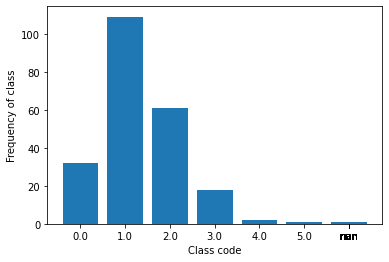

In [10]:
import matplotlib.pyplot as plt
import matplotlib

class_labels, class_counts = np.unique(gini_map['Class'], return_counts=True)
class_labels = [str(c) for c in class_labels]
plt.bar(class_labels, class_counts, align='center')
plt.gca().set_xticks(class_labels)
plt.ylabel("Frequency of class")
plt.xlabel("Class code")


Andaus a pigai is informus de s' ìndixi de Gini po unus cantu paìsus po ddus cunfrontai
cun is informus chi eus computau.

In [11]:
def _select_gini_column(row, column_labels):
    country_name = row['Country Name']
    column_labels.reverse()
    for column in column_labels:
        value = row[column]
        if not math.isnan(value):
            return {'Country': country_name, 'Year': int(column), 'Value': value}
    return {'Country': country_name, 'Year': np.nan, 'Value': np.nan}


def _get_world_bank_data():
    gini_countries_data = pd.read_csv(
        "data/world-bank-gini_countries-2022-02-15.csv", comment='#')

    years_to_select = range(2017, 2021)
    years_to_select_labels = [str(y) for y in years_to_select]
    gini_countries_selected_years = gini_countries_data.loc[:, ["Country Name"] + years_to_select_labels] \
        .apply(lambda r: _select_gini_column(r, years_to_select_labels), axis=1, result_type='expand') \
        .dropna()
    gini_countries_selected_years['Year'] = gini_countries_selected_years['Year'].astype(
        int)

    return gini_countries_selected_years


world_bank_data = _get_world_bank_data()
world_bank_data.to_csv('data/latest_gini.csv')
visualisable_world_bank_data = world_bank_data.loc[(world_bank_data['Value']>32.8) & (world_bank_data['Value']<46.2)]
visualisable_world_bank_data.sort_values(by="Value")


,Country,Year,Value
5,Albania,2017,33.2
35,Canada,2017,33.3
194,Portugal,2018,33.5
157,North Macedonia,2017,34.2
89,Greece,2017,34.4
70,Spain,2018,34.7
174,Nigeria,2018,35.1
81,United Kingdom,2017,35.1
144,Luxembourg,2018,35.4
145,Latvia,2017,35.6


In [12]:
def _get_gini_countries_data():
    gini_data = _get_world_bank_data()

    gini_countries_data = pd.DataFrame(
        [{'srd': "Grècia", 'ita': "Grecia", 'eng': "Greece"},
         {'srd': "Itàlia", 'ita': "Italia", 'eng': "Italy"},
         {'srd': "Germània", 'ita': "Germania", 'eng': "Germany"},
         {'srd': "Europa", 'ita': "Europa", 'eng': "Europe"},
         {'srd': "Rùssia", 'ita': "Russia", 'eng': "Russian Federation"},
         {'srd': "Mèssicu", 'ita': "Messico", 'eng': "Mexico"},
         {'srd': "Stadus Aunius", 'ita': "Stati Uniti", 'eng': "United States"},
         {'srd': "Tzina", 'ita': "Cina", 'eng': "China"}])
    gini_countries_data = pd.merge(gini_data, gini_countries_data,
                                   how='inner',
                                   left_on='Country',
                                   right_on='eng')\
        .sort_values(by="Value")
    gini_countries_data.loc[gini_countries_data['eng']
                            == "Russian Federation", 'eng'] = "Russia"
    return gini_countries_data


_get_gini_countries_data().head()


,Country,Year,Value,srd,ita,eng
0,Greece,2017,34.4,Grècia,Grecia,Greece
1,Italy,2017,35.9,Itàlia,Italia,Italy
3,Russian Federation,2018,37.5,Rùssia,Russia,Russia
4,United States,2017,41.2,Stadus Aunius,Stati Uniti,United States
2,Mexico,2018,45.4,Mèssicu,Messico,Mexico


Imoi impostaus beni s' infogràfica. Su còdixi est longu meda, duncas pratzeus-si-ddu.

Sa primu parti pratzit sa pàgina e imposta sa bisura bàsica.

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec


def _set_style():
    style_options = {'edge_color': '#666A6D',
                     'foreground_color': 'white',
                     'background_color': 'black',
                     'missing_color': '#A9A9A9',
                     'description_text_color': '#BFBFBF',
                     'title_size': 26,
                     'axis_label_size': 18,
                     'tick_label_size': 15,
                     'description_text_size': 12,
                     'small_text_size': 10,
                     'max_description_text_characters': 100}
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = 'Source Sans Pro'
    matplotlib.rcParams['text.color'] = style_options['foreground_color']
    matplotlib.rcParams['axes.edgecolor'] = style_options['foreground_color']
    return style_options


def _create_default_image_canvas(style_options):
    fig = plt.figure(figsize=(7.8, 10), dpi=300,
                     facecolor=style_options['background_color'], tight_layout=True)
    gs = gridspec.GridSpec(3, 2, height_ratios=[
                           0.90, 0.03, 0.07], width_ratios=[0.75, 0.15], hspace=0.22)

    axes = [fig.add_subplot(gs[0, :]),
            fig.add_subplot(gs[1, 0]),
            fig.add_subplot(gs[1, 1])]
    return (fig, axes)


Sa de duas partis imprentat sa mapa

In [14]:
def _plot_main_map(ax, df, missing_label, classes, style_options):
    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)

    num_classes = len(classes)-1

    _ = df.plot(column='Class',
                cmap='Reds',
                ax=ax,
                linewidth=0.5,
                edgecolor=style_options['edge_color'],
                k=num_classes,
                scheme='EqualInterval',
                legend=False,
                missing_kwds={'color': style_options['missing_color'], 'label': missing_label})

    # No box around plot
    ax.axis('off')


Sa de tres partis fait is barrixeddas de colori.

In [16]:
from sigfig import round
import copy
import matplotlib.transforms


def _format_gini(value):
    return round(value, 3)


def _create_base_colormap(fig, ax, main_ticks):
    cmap = matplotlib.cm.Reds
    norm = matplotlib.colors.BoundaryNorm(main_ticks, cmap.N, extend='neither')

    colorbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
                            cax=ax, orientation='horizontal', drawedges=True)
    return colorbar


def _set_colorbar_ticks(ax, style_options):
    ax.tick_params(axis='x',
                   colors=style_options['foreground_color'],
                   labelcolor=style_options['foreground_color'],
                   grid_color=style_options['edge_color'],
                   labelsize=style_options['tick_label_size'])


def _format_colormap_scale(axis, label_title, classes, style_options):
    foreground_color = style_options['foreground_color']

    _set_colorbar_ticks(axis, style_options)

    axis.set_xlabel(
        label_title, color=foreground_color,
        size=style_options['axis_label_size'],
        labelpad=10)
    bottom_labels = [_format_gini(l) for l in classes]
    axis.set_xticklabels(bottom_labels)
    return axis


def _format_reference_countries(axis, xlim, min_data, lang, style_options):
    gini_countries_data = _get_gini_countries_data()
    gini_countries_data = gini_countries_data.loc[gini_countries_data['Value'] >= min_data]

    countries_labels = gini_countries_data.apply(lambda r: f"{r[lang]}\n{_format_gini(r['Value'])} ({r['Year']})", axis=1)

    axis.set_xlim(xlim)
    axis.set_xticks(ticks=gini_countries_data['Value'].to_numpy())
    axis.set_xticklabels(
        countries_labels, rotation=-40, ha="left", rotation_mode="anchor")

    axis.tick_params(axis='x',
                     length=10,
                     colors=style_options['foreground_color'],
                     labelcolor=style_options['foreground_color'],
                     grid_color=style_options['edge_color'],
                     labelsize=style_options['description_text_size'])


def _plot_colormap(fig, ax, min_data, classes, label_title, lang, style_options):
    top_color_axis = ax.twiny()
    bottom_color_axis = copy.copy(ax)

    colorbar = _create_base_colormap(fig, ax, main_ticks=classes)

    _format_colormap_scale(top_color_axis,
                           label_title,
                           colorbar.get_ticks(),
                           style_options)
    _format_reference_countries(bottom_color_axis,
                                bottom_color_axis.get_xlim(),
                                min_data,
                                lang,
                                style_options)
    colorbar.dividers.set_linewidth(1)


def _plot_empty_data_colormap(fig, ax, missing_label, style_options):
    foreground_color = style_options['foreground_color']

    cmap = matplotlib.colors.ListedColormap([style_options['missing_color']])

    colorbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap),
                            cax=ax,
                            orientation='horizontal',
                            drawedges=True)
    _set_colorbar_ticks(ax, style_options)
    ax.tick_params(size=0)
    colorbar.set_ticks([])
    colorbar.set_label(missing_label,
                       size=style_options['tick_label_size'],
                       labelpad=7.2,
                       color=foreground_color)

    return colorbar


Aciungeus un' aina chi s' at a agiudai a pratziri su scritu descridori de sa màgini

In [17]:
def _break_text(text, num_characters):
    words = text.split(' ')
    output_string = ''
    length_current_line = 0
    for index, curr_word in enumerate(words):
        length_curr_word = len(curr_word)

        if index == 0:
            length_current_line = length_curr_word
            curr_separator = ''
        elif length_current_line + 1 + length_curr_word <= num_characters:
            length_current_line += 1 + length_curr_word
            curr_separator = ' '
        else:
            length_current_line = length_curr_word
            curr_separator = '\n'
        output_string += curr_separator + curr_word
    return output_string


_break_text(
    "Lorem Ipsum is simply dummy text of the printing and typesetting in", 20)


'Lorem Ipsum is\nsimply dummy text of\nthe printing and\ntypesetting in'

Imoi eus a imprentai sa màgini

/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:467: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:909: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/tmp/ipykernel_426/2651580168.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(bottom_labels)
/tmp/ipykernel_426/3358178564.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/srd/gini.png", bbox_inches="tight")
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so re

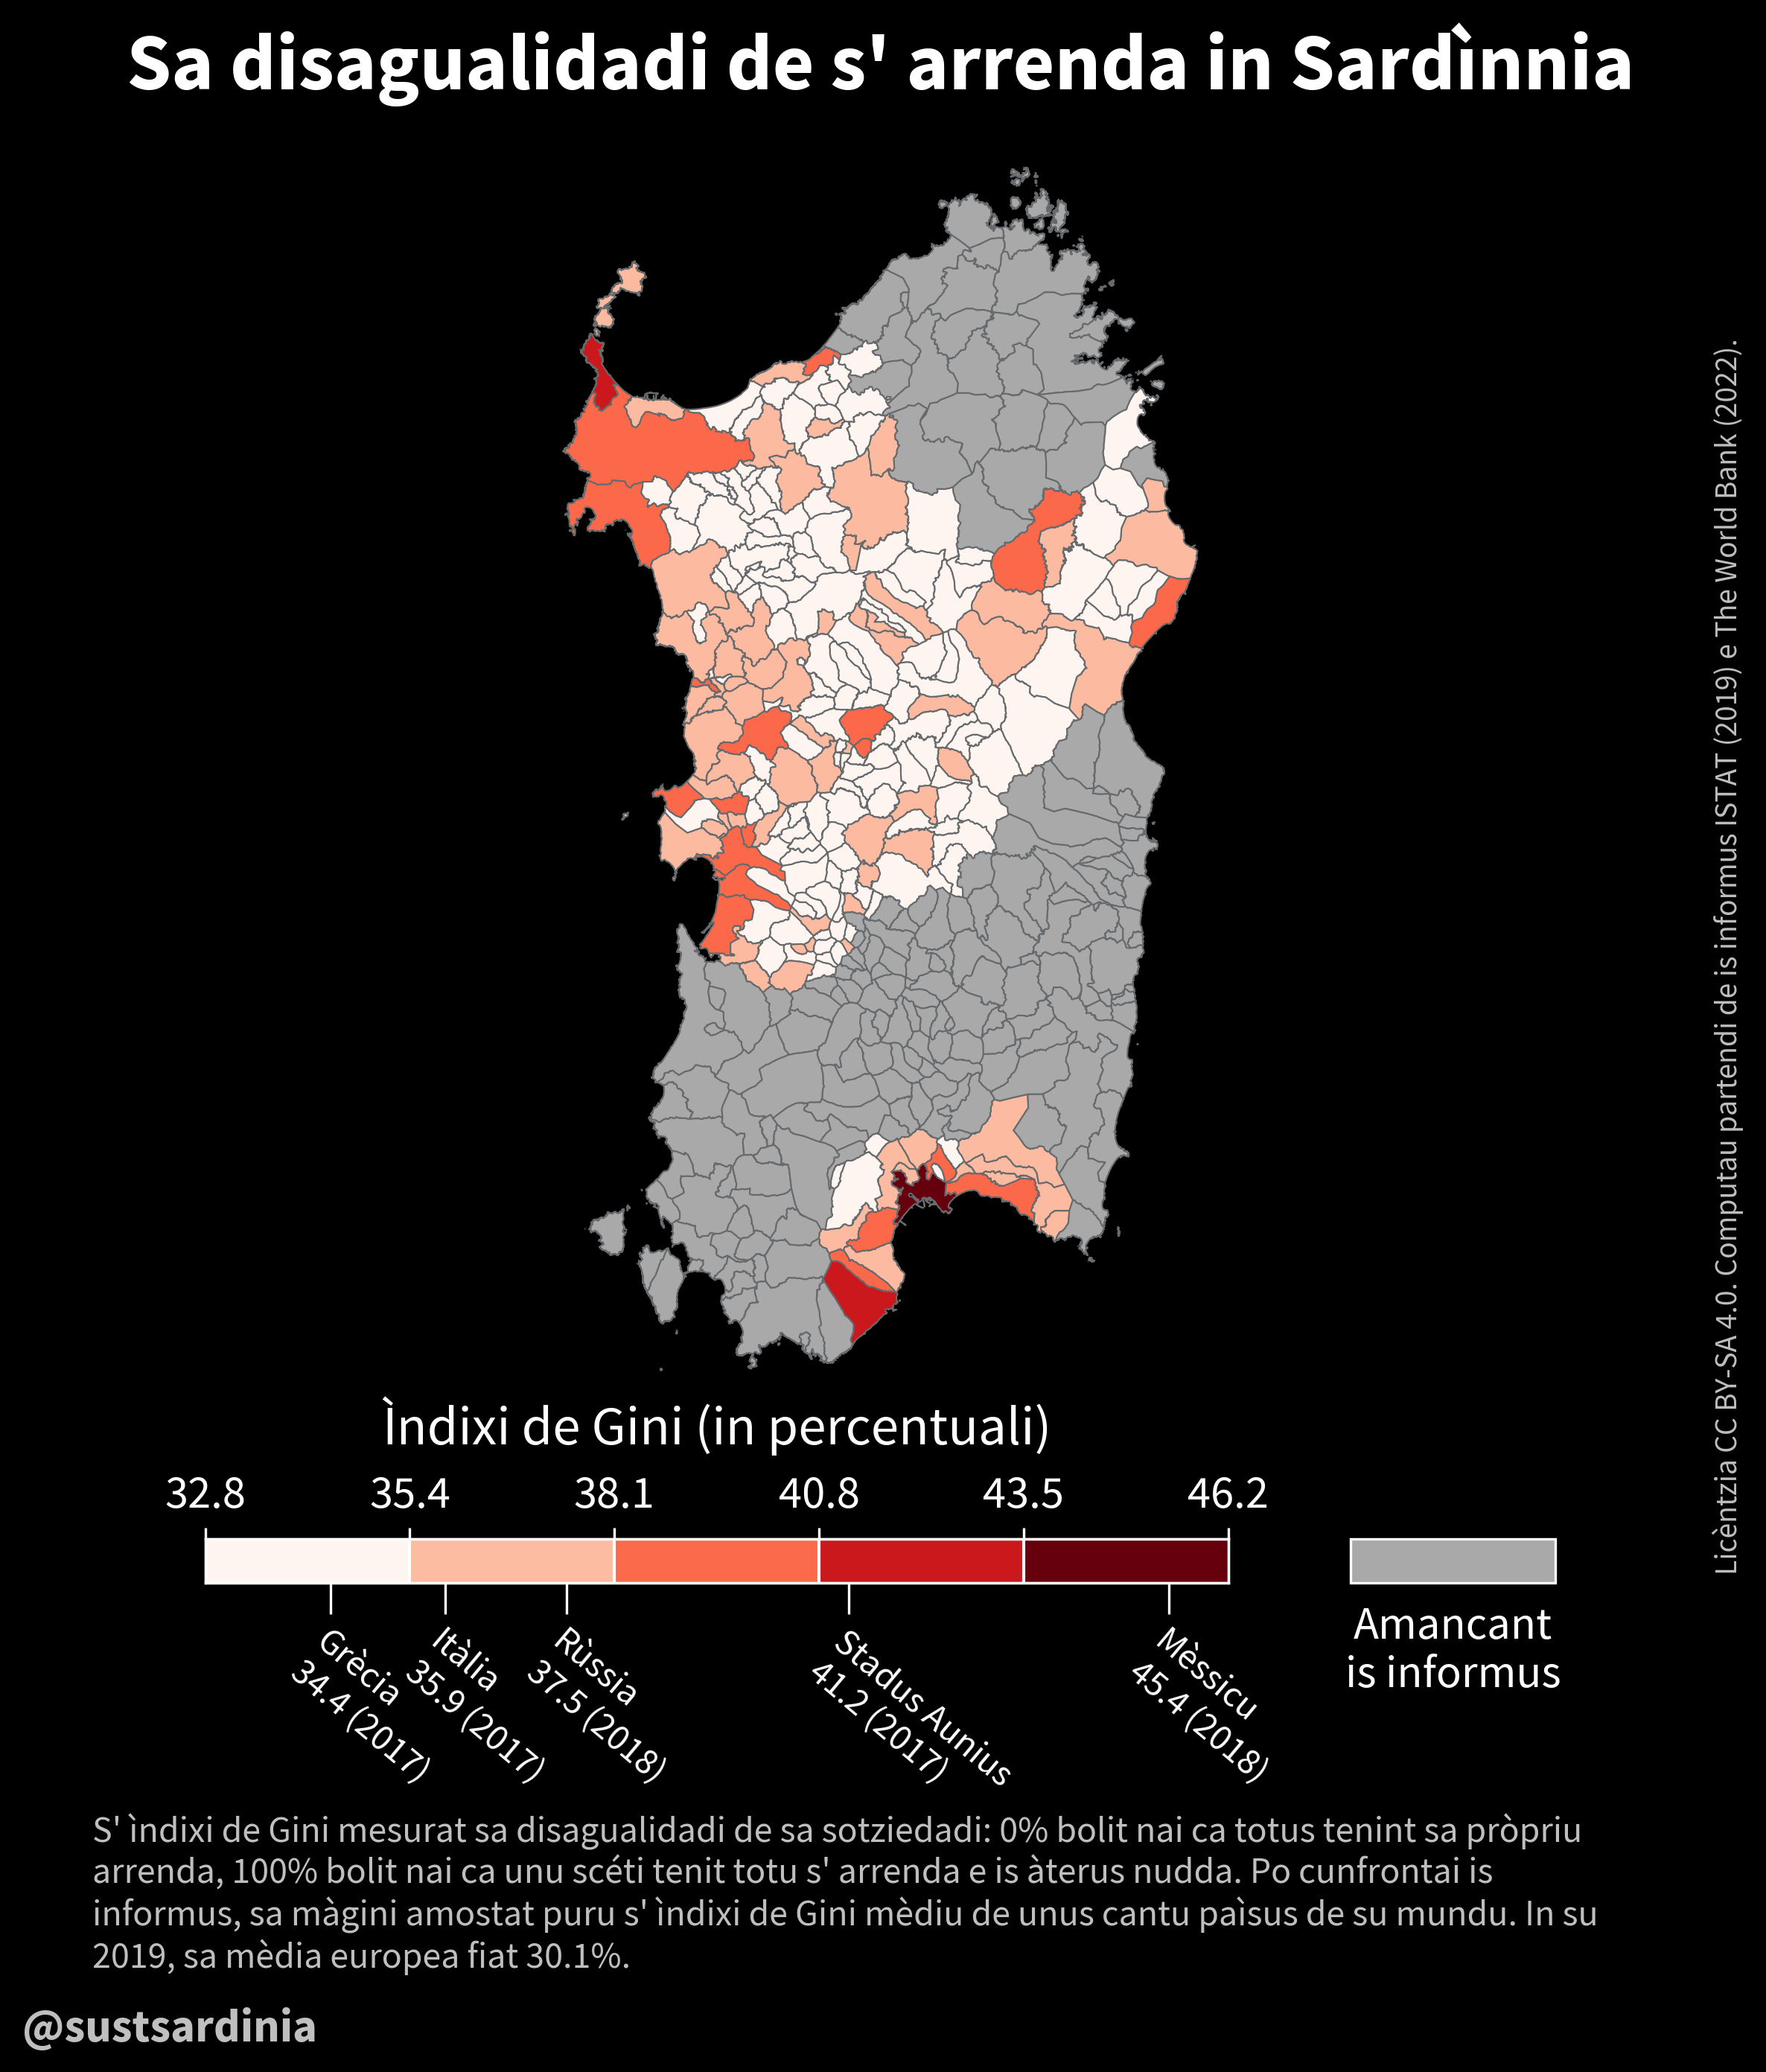

In [18]:
def _plot_whole_infographic(df, title, label_title, description, missing_label, info, lang='srd', classes=classes):
    # Overall settings
    style_options = _set_style()

    fig, axes = _create_default_image_canvas(style_options)

    _plot_main_map(
        axes[0], df, missing_label, classes, style_options)

    min_data = df['Gini'].min()
    _plot_colormap(fig, axes[1], min_data, classes,
                   label_title, lang, style_options)
    _plot_empty_data_colormap(fig, axes[2], missing_label, style_options)

    # Add text
    axes[0].set_title(
        title, fontsize=style_options['title_size'], fontweight='bold')
    plt.figtext(0.999, 0.5,
                info,
                rotation=90,
                ha="center",
                va="center",
                fontsize=style_options['small_text_size'],
                c=style_options['description_text_color'])
    plt.figtext(0.02, 0.02,
                "@sustsardinia",
                ha="left",
                va="center",
                fontdict={'size': style_options['tick_label_size'],
                          'weight': 'bold',
                          'color': style_options['description_text_color']})
    plt.figtext(0.06, 0.08,
                _break_text(
                    description, style_options['max_description_text_characters']),
                ha="left",
                va="center",
                wrap=True,
                fontdict={'size': style_options['description_text_size'],
                          'color': style_options['description_text_color']})


_plot_whole_infographic(gini_map,
                        title="Sa disagualidadi de s' arrenda in Sardìnnia",
                        label_title="Ìndixi de Gini (in percentuali)",
                        description="S' ìndixi de Gini mesurat sa disagualidadi de sa sotziedadi: 0% bolit nai ca totus tenint sa pròpriu arrenda, 100% bolit nai ca unu scéti tenit totu s' arrenda e is àterus nudda. Po cunfrontai is informus, sa màgini amostat puru s' ìndixi de Gini mèdiu de unus cantu paìsus de su mundu. In su 2019, sa mèdia europea fiat 30.1% e sa tenta est de ddu abasciai a 27.5%.",
                        missing_label="Amancant\nis informus",
                        lang='srd',
                        info="Licèntzia CC BY-SA 4.0. Computau partendi de is informus ISTAT (2019) e The World Bank (2022).")
plt.savefig("figures/srd/gini.png", bbox_inches="tight")


/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:467: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:909: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/tmp/ipykernel_426/2651580168.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(bottom_labels)
/tmp/ipykernel_426/1926733316.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/ita/gini.png", bbox_inches="tight")
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so res

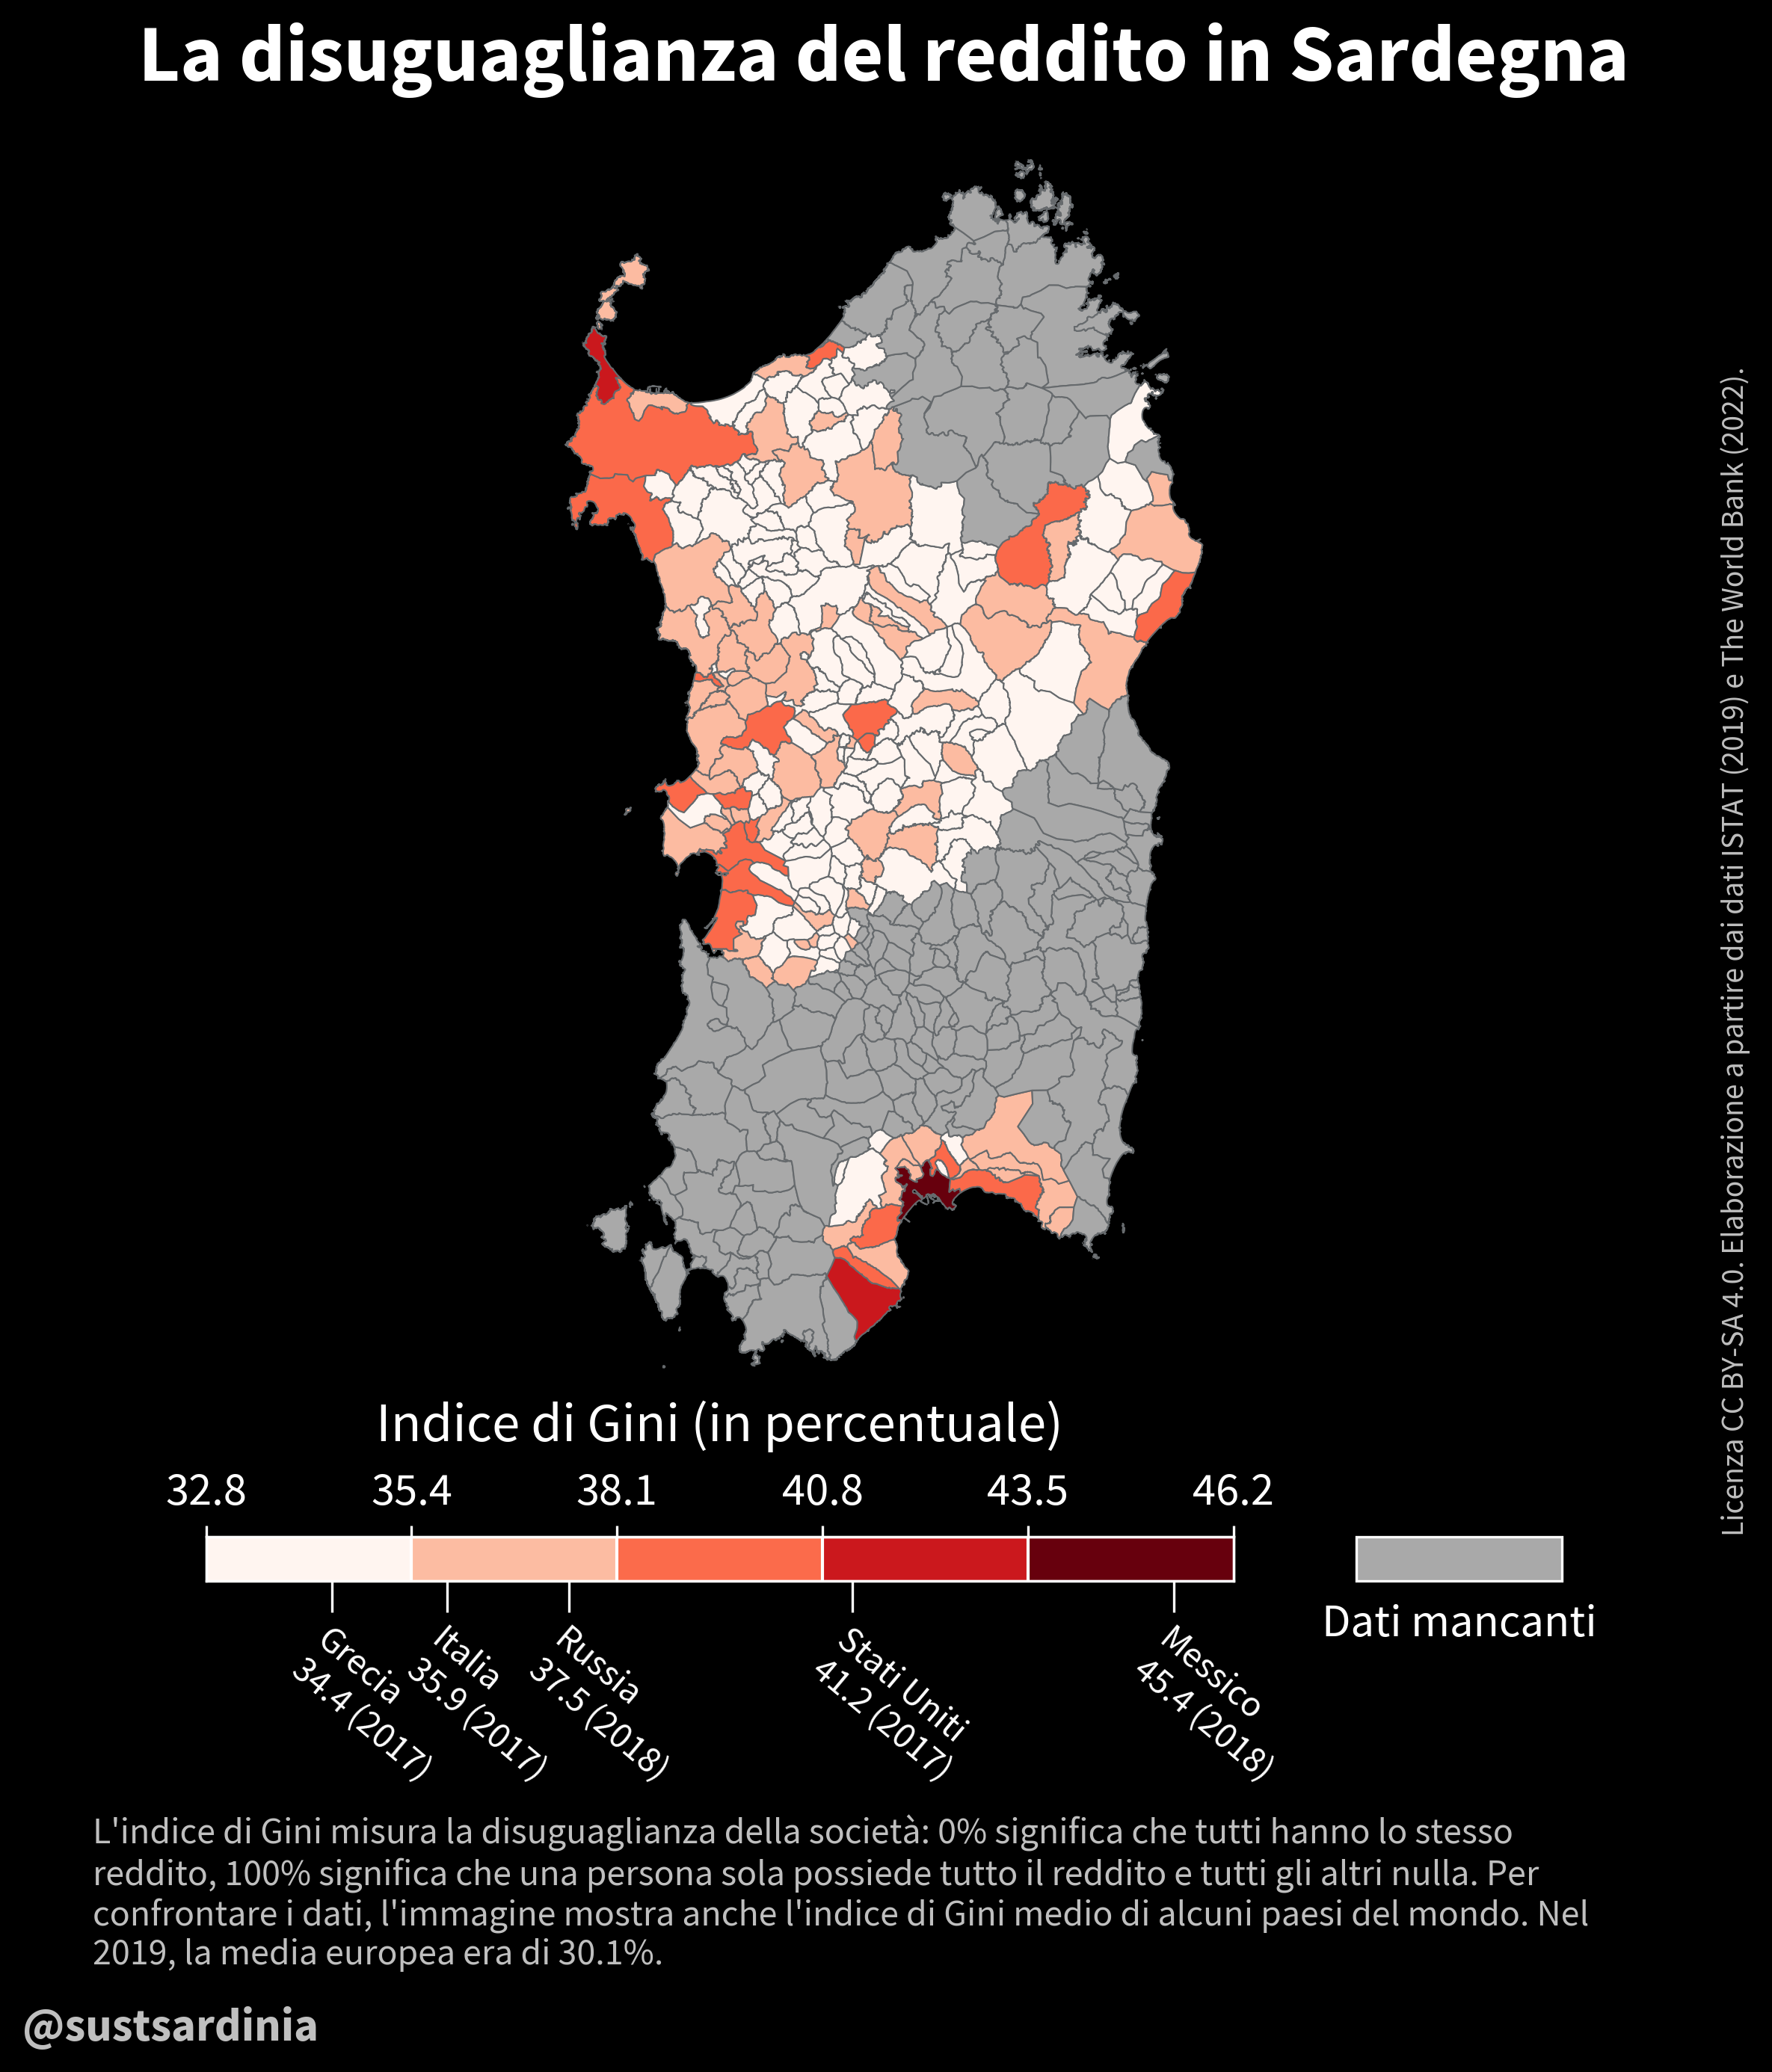

In [19]:
_plot_whole_infographic(gini_map,
                        title="La disuguaglianza del reddito in Sardegna",
                        label_title="Indice di Gini (in percentuale)",
                        description="L'indice di Gini misura la disuguaglianza della società: 0% significa che tutti hanno lo stesso reddito, 100% significa che una persona sola possiede tutto il reddito e tutti gli altri nulla. Per confrontare i dati, l'immagine mostra anche l'indice di Gini medio di alcuni paesi del mondo. Nel 2019, la media europea era di 30.1%, e l'obiettivo è di portarlo a 27.5%.",
                        missing_label="Dati mancanti",
                        lang='ita',
                        info="Licenza CC BY-SA 4.0. Elaborazione a partire dai dati ISTAT (2019) e The World Bank (2022).")
plt.savefig("figures/ita/gini.png", bbox_inches="tight")


/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:467: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/geopandas/plotting.py:909: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.draw()
/tmp/ipykernel_426/2651580168.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(bottom_labels)
/tmp/ipykernel_426/1565412440.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/eng/gini.png", bbox_inches="tight")
/home/apicciau/miniconda3/envs/data-science/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so res

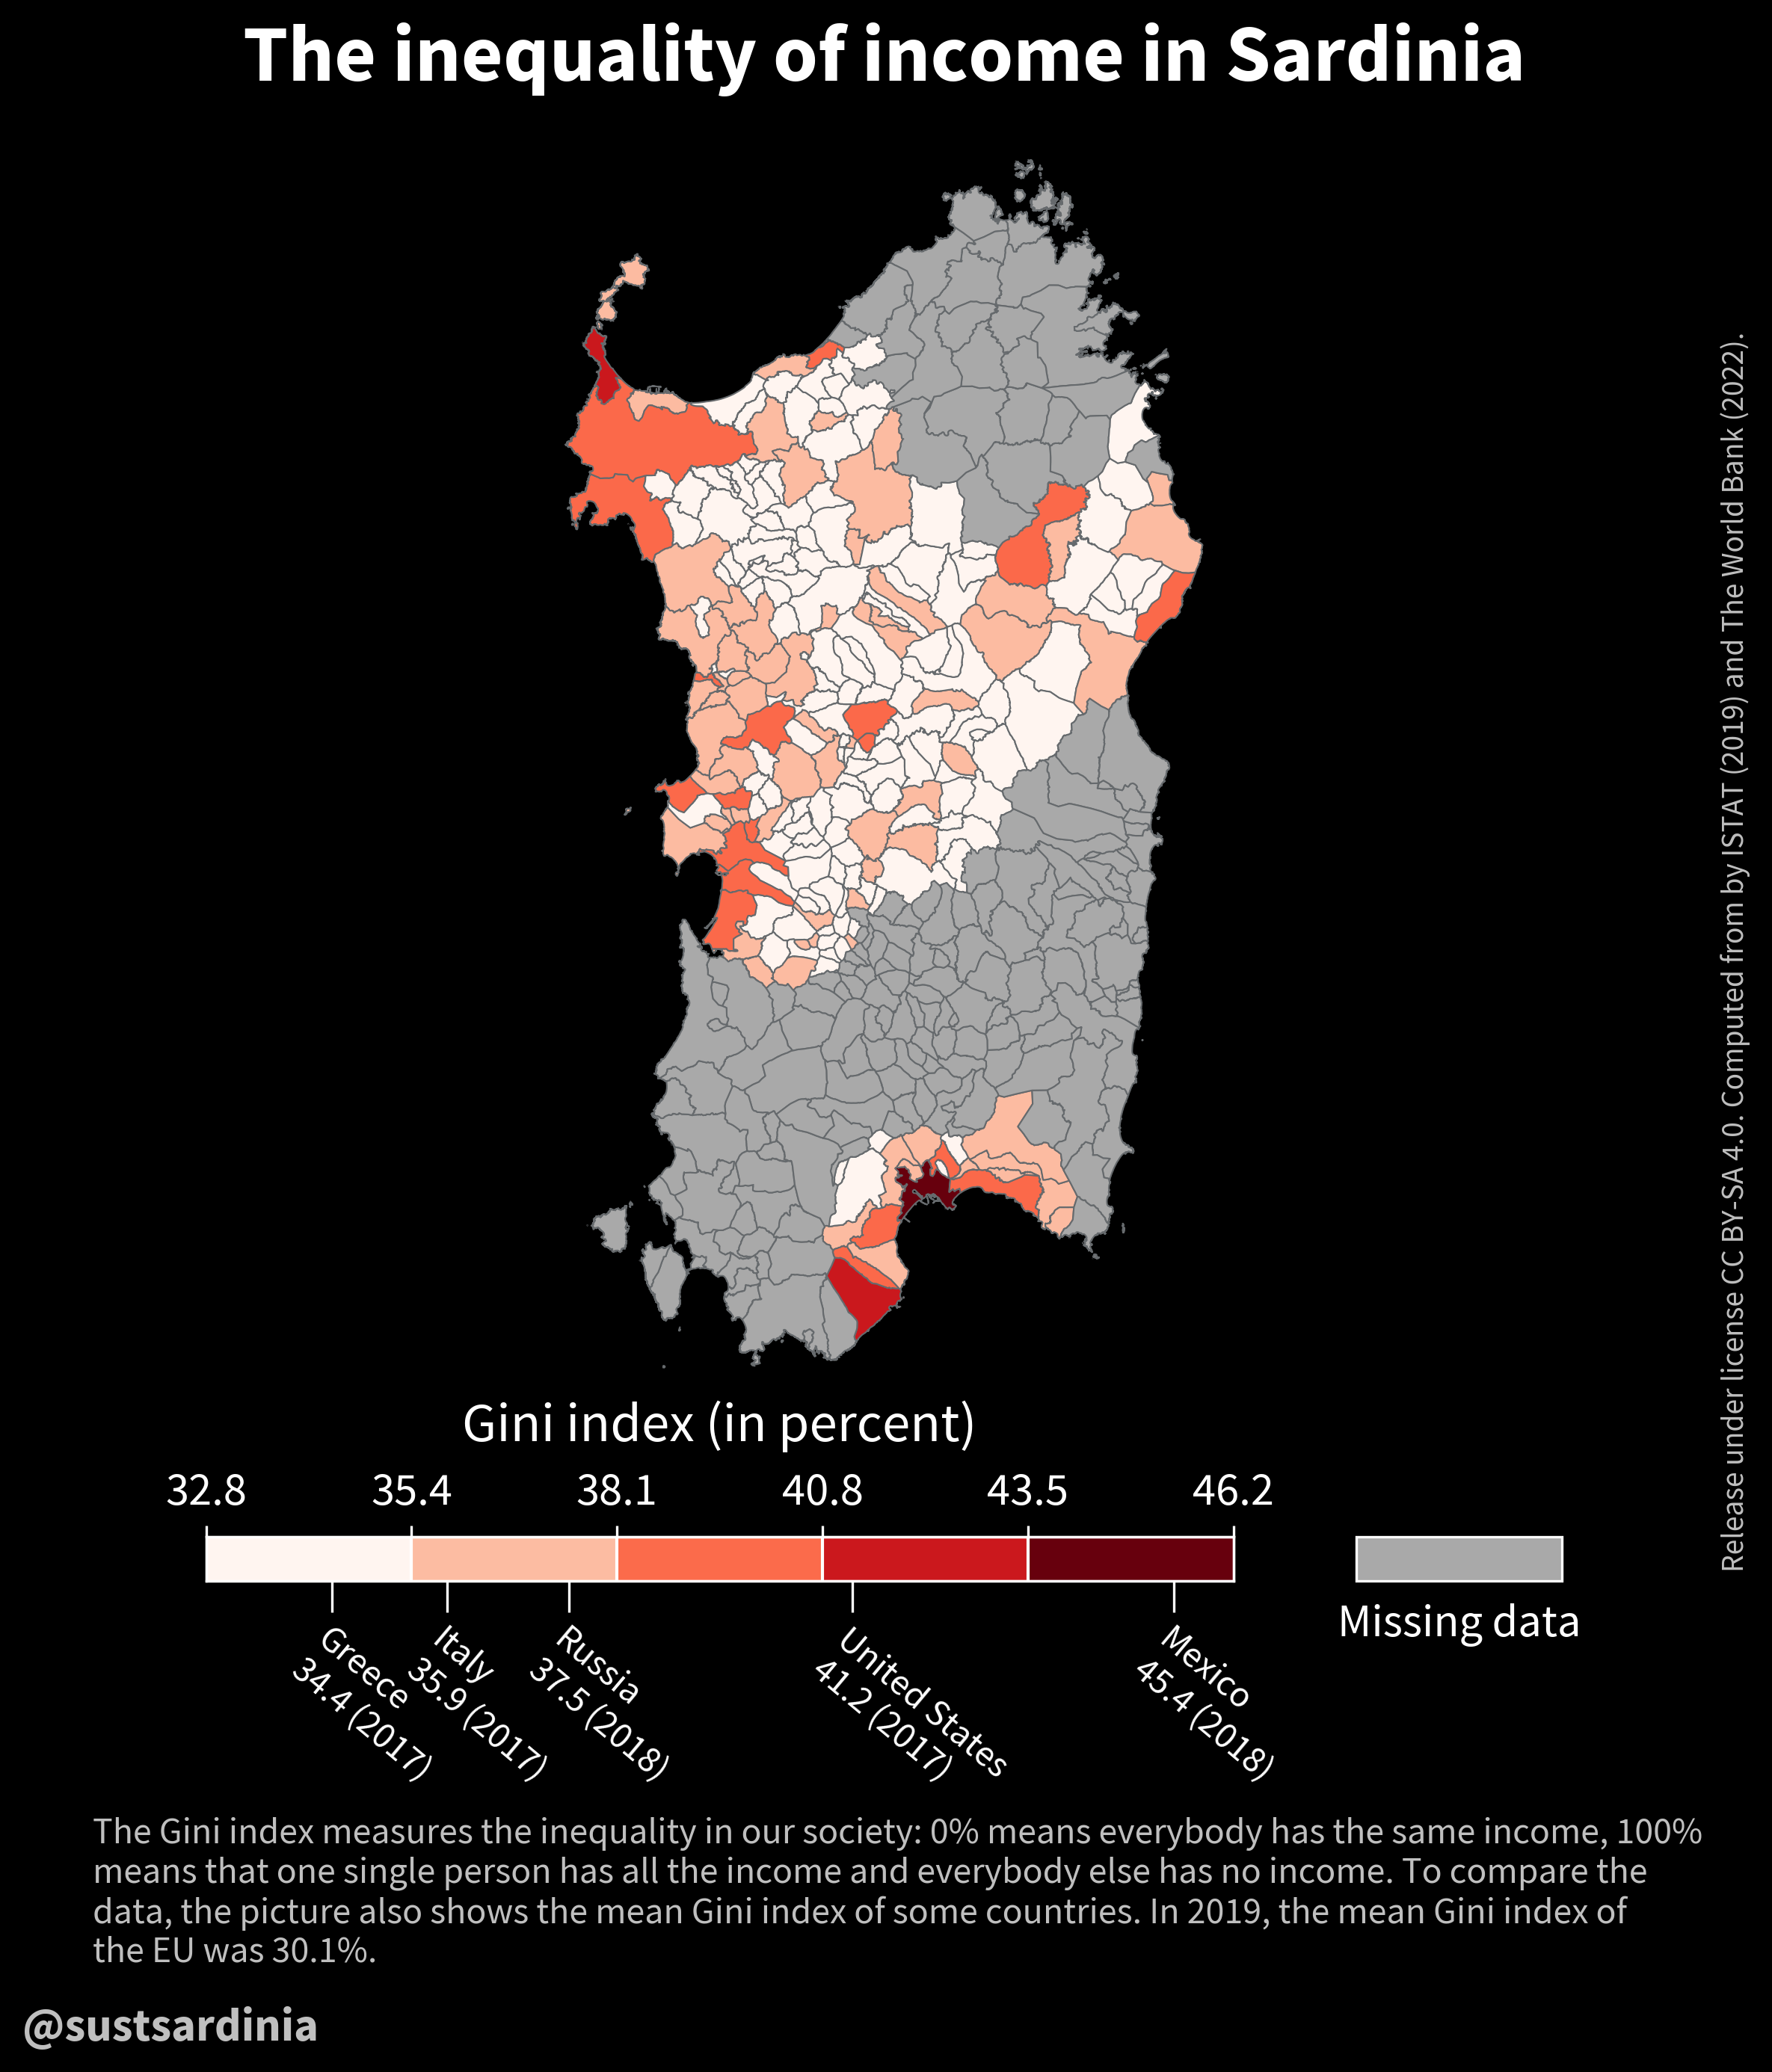

In [20]:
_plot_whole_infographic(gini_map,
                        title="The inequality of income in Sardinia",
                        label_title="Gini index (in percent)",
                        description="The Gini index measures the inequality in our society: 0% means everybody has the same income, 100% means that one single person has all the income and everybody else has no income. To compare the data, the picture also shows the mean Gini index of some countries. In 2019, the mean Gini index of the EU was 30.1%, and the objective is to bring it down to 27.5%.",
                        missing_label="Missing data",
                        lang='eng',
                        info="Release under license CC BY-SA 4.0. Computed from by ISTAT (2019) and The World Bank (2022).")
plt.savefig("figures/eng/gini.png", bbox_inches="tight")